# **Depression Detection system based on Machine Learning and Natural language Processing using Twitter Analysis**

<hr>

### **( Team D.Warrior )**
### **Members:**
<ol>

###1. Sadia Iqbal (2019-BSE-025)
###2. Ghulam Fatima (2019-BSE-006)
###3. Sabahat Tasleem (2019-BSE-024)

</ol>

![Why so sad?](https://www.economist.com/cdn-cgi/image/width=1424,quality=80,format=auto/sites/default/files/images/print-edition/20171125_USP001_0.jpg)

---


# **Introduction**

Depression is a serious mental health condition that affects millions of people around the world. Social media platforms like Twitter have become popular outlets for people to express their emotions and feelings, including those related to depression. As a result, there is a growing interest in using machine learning (ML) and natural language processing (NLP) techniques to analyze tweets and identify signs of depression.

Our project aims to develop a depression detection system using ML and NLP techniques applied to Twitter data. The system will analyze tweets from users and use these data to predict whether or not they may be suffering from depression.

Our work is significant as it has the potential to help people who are suffering from depression by providing them with an warning system that can alert them to the possibility of depression according to their latest tweets. Overall, Our project has the potential to make a significant impact on mental health care and improve the quality of life for people suffering from depression.

# **Steps**
<ol>

###1. Import Libraries and Dataset
###2. Cleaning and Preprocessing
###3. Data Polarization
###4. Data Visualization
###5. Hierarchical Clustering on Negative Tweets
###6. Hierarchical Clustering on Positive Tweets
###7. Save model
</ol>

# **1. Import Libraries and Dataset**

In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import preprocessing libraries
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
# import polarization libraries
nltk.downloader.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
# import model libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pickle

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#İmport dataset
df = pd.read_csv("/content/Dataset.csv")
df.head()

,profile,user_id,user_name,tweet_text,retweet_text,like_text
0,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,It's just over 2 years since I was diagnosed w...,Just finished a service centre call that didn'...,Just finished a service centre call that didn'...
1,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,"It's Sunday, I need a break, so I'm planning t...",RT @CambridgeNewsUK: Man taken to hospital aft...,Just finished a service centre call that didn'...
2,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,Awake but tired. I need to sleep but my brain ...,@EONhelp you too! ☀️,@the_candourist glad to see that you survived ...
3,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,RT @SewHQ: #Retro bears make perfect gifts and...,"@EONhelp hi, thx. Yes, I found it in the end a...",I’ve just remembered that the new house has r...
4,https://twitter.com/2curlykitties,1.013187e+09,@2curlykitties,It’s hard to say whether packing lists are mak...,"@EONhelp re my last tweet, don't worry, spoke ...",Square 10 / lacy #crochet / pale blue DK yarn ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7354 entries, 0 to 7353
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   profile       7354 non-null   object 
 1   user_id       7351 non-null   float64
 2   user_name     7349 non-null   object 
 3   tweet_text    7350 non-null   object 
 4   retweet_text  7336 non-null   object 
 5   like_text     7336 non-null   object 
dtypes: float64(1), object(5)
memory usage: 344.8+ KB


In [ ]:
df.shape

(7354, 6)

# **2. Data Cleaning and Preprocessing**

In [ ]:
# removing all rows where even 1 rows is null
df.dropna(inplace = True)
df.shape

(7318, 6)

In [ ]:
# Create a new DataFrame and add rows of all three columns to the first column
df = pd.DataFrame({'text': df['tweet_text'].tolist() + df['retweet_text'].tolist() + df['like_text'].tolist()})
df.head()


,text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21954 entries, 0 to 21953
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    21954 non-null  object
dtypes: object(1)
memory usage: 171.6+ KB


In [ ]:
# Pre-processing

nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

def preprocess_text(df, column_name):
    """
    Preprocesses text data in a given column of a pandas DataFrame.
    """
    # Convert to lowercase
    df[column_name] = df[column_name].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # Removing numerical values
    df[column_name] = df[column_name].str.replace("\d","")
    # Removing punctations
    df[column_name] = df[column_name].str.replace("[^\w\s]","")
    df[column_name] = df[column_name].str.replace(r"(\x23.* )+", "")
    df[column_name] = df[column_name].str.replace('_', '')
    df[column_name] = df[column_name].str.replace('__', '')
    # Removing double space
    df[column_name] = df[column_name].str.replace("\s+", " ")
    # Removing user
    df[column_name] = df[column_name].str.replace('(@[A-Za-z]+[A-Za-z0-9-_]+)', '') #remove twitted at
    # Removing links
    df[column_name] = df[column_name].str.replace('http\S+', '')
    # Removing small words which are less than given condition
    df[column_name] = df[column_name].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
    # STOPWORDS
    sw = stopwords.words("english")
    df[column_name] = df[column_name].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    # Lemmatization (forgot converted into forget)
    df[column_name] = df[column_name].apply(lambda x: " ".join([Word(x).lemmatize()]))
    # Word Tokenization
    df[column_name+"_tokens"] = df[column_name].apply(lambda x: TextBlob(x).words)
    # Frequency Analysis
    df[column_name+"_frequency"] = df[column_name].apply(lambda x: len(str(x).split(" ")))

    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# apply pre-processing function on'text'
df = preprocess_text(df,'text')
df.head()

<ipython-input-8-dc9b661b016c>:15: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("\d","")
<ipython-input-8-dc9b661b016c>:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("[^\w\s]","")
<ipython-input-8-dc9b661b016c>:18: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace(r"(\x23.* )+", "")
<ipython-input-8-dc9b661b016c>:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace("\s+", " ")
<ipython-input-8-dc9b661b016c>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  df[column_name] = df[column_name].str.replace('(@[A-Za-z]+[A-Za-z0-9-_]+)', '') #remove twitted at
<ipython

,text,text_tokens,text_frequency
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",11
1,sunday need break planning spend little time p...,"[sunday, need, break, planning, spend, little,...",8
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",6
3,sewhq retro bears make perfect gifts great beg...,"[sewhq, retro, bears, make, perfect, gifts, gr...",11
4,hard whether packing lists making life easier ...,"[hard, whether, packing, lists, making, life, ...",13


# **3. Data Polarization**

In [ ]:
sia = SentimentIntensityAnalyzer()

positive_words_tweet = []
negative_words_tweet = []
neutral_words_tweet = []

positive_sentiment_score = 0
negative_sentiment_score = 0
neutral_sentiment_score = 0



for index, row in df.iterrows():
    tweet = row['text']


    # Sentiment analysis for tweet_text column
    scores_tweet = sia.polarity_scores(tweet)
    df.at[index, 'tweet_positive_score'] = scores_tweet['pos']
    df.at[index, 'tweet_negative_score'] = scores_tweet['neg']
    df.at[index, 'tweet_neutral_score'] = scores_tweet['neu']

    if scores_tweet['compound'] > 0.1:
        df.at[index, 'tweet_sentiment'] = 'positive'
        positive_sentiment_score += 1
        positive_words_tweet.extend(tweet.split())

    elif scores_tweet['compound'] < -0.1:
        df.at[index, 'tweet_sentiment'] = 'negative'
        negative_sentiment_score += 1
        negative_words_tweet.extend(tweet.split())

    else:
        df.at[index, 'tweet_sentiment'] = 'neutral'
        neutral_sentiment_score += 1
        neutral_words_tweet.extend(tweet.split())



# Preprocessing the bag of words for all sentiments
positive_words_tweet = [word.lower() for word in positive_words_tweet if word.isalpha()]
negative_words_tweet = [word.lower() for word in negative_words_tweet if word.isalpha()]
neutral_words_tweet = [word.lower() for word in neutral_words_tweet if word.isalpha()]

df.head(10)

,text,text_tokens,text_frequency,tweet_positive_score,tweet_negative_score,tweet_neutral_score,tweet_sentiment
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",11,0.000,0.375,0.625,negative
1,sunday need break planning spend little time p...,"[sunday, need, break, planning, spend, little,...",8,0.000,0.000,1.000,neutral
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",6,0.000,0.367,0.633,negative
3,sewhq retro bears make perfect gifts great beg...,"[sewhq, retro, bears, make, perfect, gifts, gr...",11,0.464,0.000,0.536,positive
4,hard whether packing lists making life easier ...,"[hard, whether, packing, lists, making, life, ...",13,0.176,0.195,0.629,positive
5,making packing lists hobby movinghouse,"[making, packing, lists, hobby, movinghouse]",5,0.000,0.000,1.000,neutral
6,point keeping stuff nostalgic reasons cross li...,"[point, keeping, stuff, nostalgic, reasons, cr...",10,0.000,0.000,1.000,neutral
7,currently findingboxesofrandomshit packing pha...,"[currently, findingboxesofrandomshit, packing,...",7,0.000,0.000,1.000,neutral
8,cant bothered cook take away lazy,"[cant, bothered, cook, take, away, lazy]",6,0.232,0.295,0.473,negative
9,itventsnews releases promo video final series ...,"[itventsnews, releases, promo, video, final, s...",8,0.000,0.000,1.000,neutral


In [ ]:
lexicon = sia.lexicon
for word, score in lexicon.items():
    print(f"{word}: {score}")

Streaming output truncated to the last 5000 lines.
embarrassed: -1.5
embarrassedly: -1.1
embarrasses: -1.7
embarrassing: -1.6
embarrassingly: -1.7
embarrassment: -1.9
embarrassments: -1.7
embittered: -0.4
embrace: 1.3
emergency: -1.6
emotional: 0.6
empathetic: 1.7
emptied: -0.7
emptier: -0.7
emptiers: -0.7
empties: -0.7
emptiest: -1.8
emptily: -1.0
emptiness: -1.9
emptinesses: -1.5
emptins: -0.3
empty: -0.8
emptying: -0.6
enchanted: 1.6
encourage: 2.3
encouraged: 1.5
encouragement: 1.8
encouragements: 2.1
encourager: 1.5
encouragers: 1.5
encourages: 1.9
encouraging: 2.4
encouragingly: 2.0
endorse: 1.3
endorsed: 1.0
endorsement: 1.3
endorses: 1.4
enemies: -2.2
enemy: -2.5
energetic: 1.9
energetically: 1.8
energetics: 0.3
energies: 0.9
energise: 2.2
energised: 2.1
energises: 2.2
energising: 1.9
energization: 1.6
energizations: 1.5
energize: 2.1
energized: 2.3
energizer: 2.1
energizers: 1.7
energizes: 2.1
energizing: 2.0
energy: 1.1
engage: 1.4
engaged: 1.7
engagement: 2.0
engagements: 0.

In [ ]:
print("Total Positive Sentiment Score:", positive_sentiment_score)
print("Total Negative Sentiment Score:", negative_sentiment_score)
print("Total Neutral Sentiment Score:", neutral_sentiment_score)

Total Positive Sentiment Score: 7778
Total Negative Sentiment Score: 5681
Total Neutral Sentiment Score: 8495


In [ ]:
from nltk.probability import FreqDist

positive_freq_dist_tweet = FreqDist(positive_words_tweet)
negative_freq_dist_tweet = FreqDist(negative_words_tweet)
neutral_freq_dist_tweet = FreqDist(neutral_words_tweet)

print('Most common positive words for tweets:')
print(positive_freq_dist_tweet.most_common(50))
print()

print('Most common negative words for tweets:')
print(negative_freq_dist_tweet.most_common(50))
print()

print('Most common neutral words for tweets:')
print(neutral_freq_dist_tweet.most_common(50))

Most common positive words for tweets:
[('like', 780), ('love', 605), ('thank', 453), ('good', 421), ('people', 384), ('dont', 382), ('happy', 296), ('twitter', 293), ('best', 269), ('know', 254), ('much', 237), ('thanks', 236), ('please', 229), ('following', 223), ('well', 222), ('time', 212), ('would', 211), ('youre', 210), ('today', 208), ('make', 198), ('great', 195), ('hope', 190), ('hello', 189), ('need', 188), ('help', 188), ('life', 187), ('want', 187), ('better', 182), ('really', 178), ('think', 173), ('still', 168), ('year', 159), ('never', 159), ('thats', 155), ('follow', 155), ('friends', 154), ('rights', 147), ('right', 143), ('work', 134), ('friend', 132), ('feel', 131), ('always', 130), ('cant', 130), ('world', 127), ('positive', 126), ('even', 125), ('support', 124), ('look', 124), ('yeah', 124), ('also', 124)]

Most common negative words for tweets:
[('people', 420), ('dont', 262), ('like', 245), ('stop', 207), ('fuck', 193), ('know', 172), ('today', 167), ('shit', 166

In [ ]:
# Create a new DataFrame with only the negative tweets and their negative scores
negative_df = df.loc[df['tweet_sentiment'] == 'negative', ['text', 'tweet_negative_score']]

# Rename the columns in the new DataFrame
negative_df.columns = ['Negative Tweet', 'Negative Score']

In [ ]:
negative_df.head()

,Negative Tweet,Negative Score
0,years since diagnosed anxiety depression today...,0.375
2,awake tired need sleep brain ideas,0.367
8,cant bothered cook take away lazy,0.295
14,urgh anxiety come breathe,0.362
27,even smallest thing still makes heart break do...,0.150


# **4. Data Visualization**

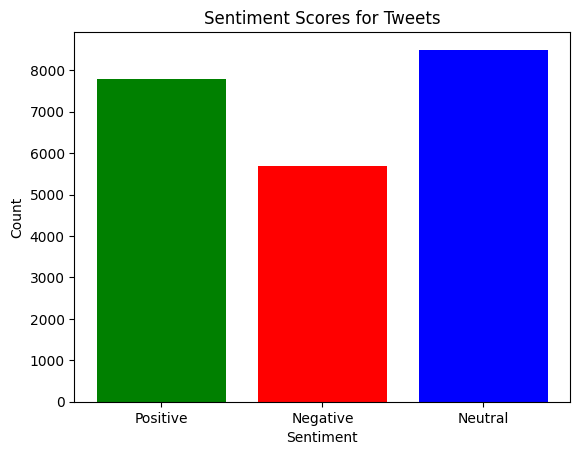

In [ ]:
# Create a bar chart of the sentiment scores
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_sentiment_score, negative_sentiment_score, neutral_sentiment_score]
plt.bar(labels, scores, color=['green', 'red', 'blue'])
plt.title('Sentiment Scores for Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

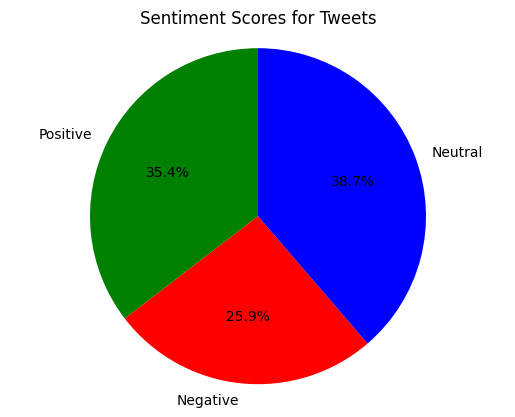

In [ ]:
labels = ['Positive', 'Negative', 'Neutral']
scores = [positive_sentiment_score, negative_sentiment_score, neutral_sentiment_score]

# Create the pie chart
fig, ax = plt.subplots()
ax.pie(scores, labels=labels, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Sentiment Scores for Tweets')
plt.show()


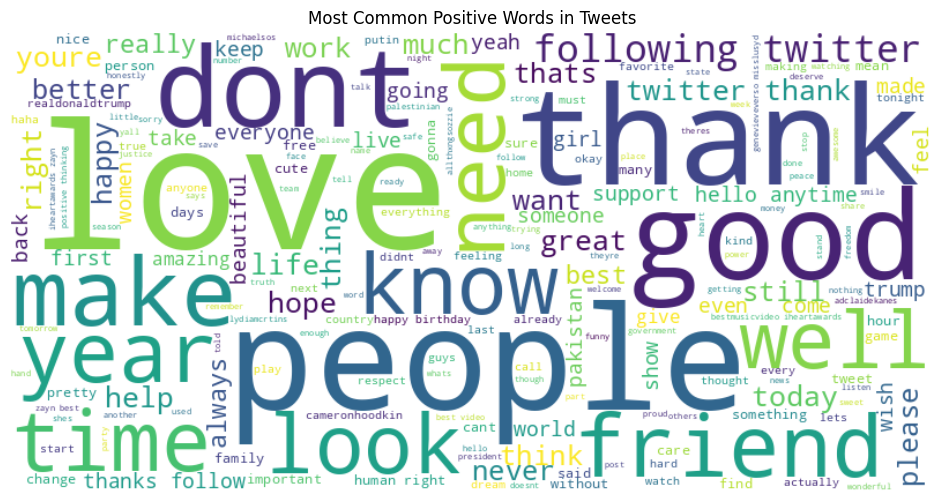

In [ ]:
# Create a word cloud of the most common positive words
from wordcloud import WordCloud

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Positive Words in Tweets')
plt.show()

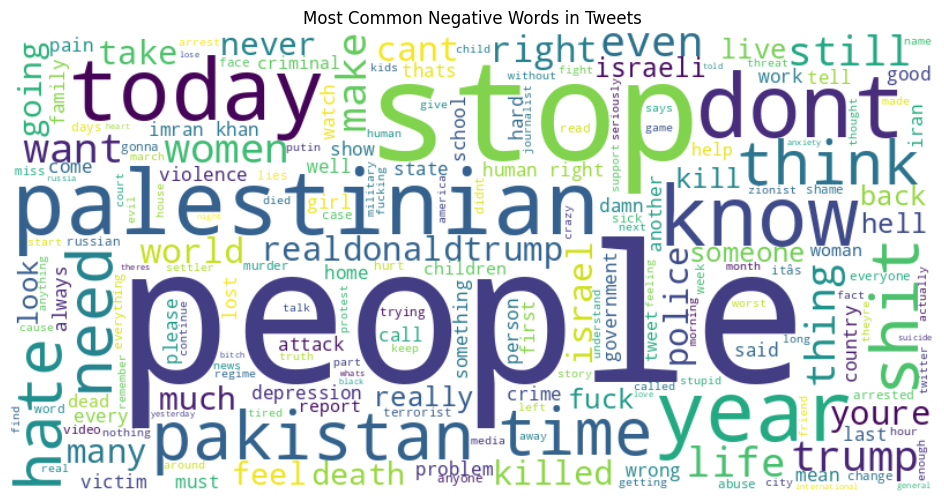

In [ ]:
# Create a word cloud of the most common negative words
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Negative Words in Tweets')
plt.show()

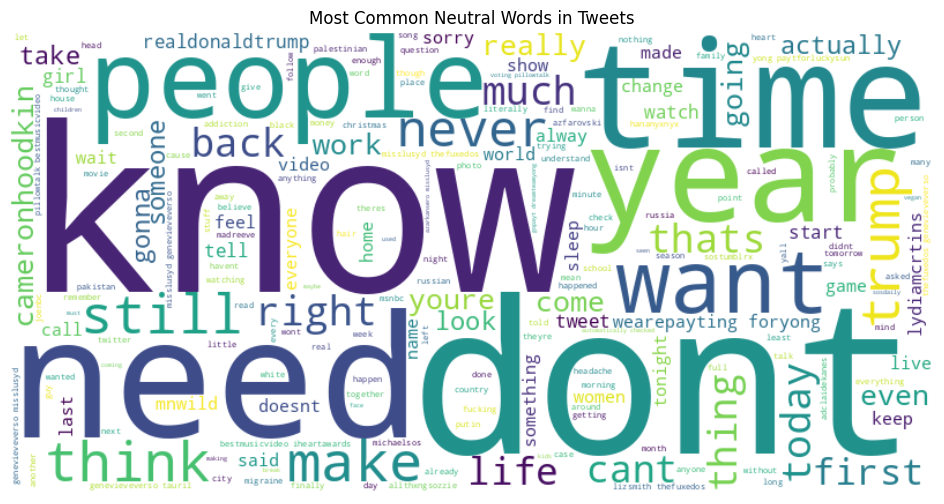

In [ ]:
# Create a word cloud of the most common neutral words
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(neutral_words_tweet))
plt.figure(figsize=(12, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Neutral Words in Tweets')
plt.show()

# **5. hierarchical clustering on Negative Tweets**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

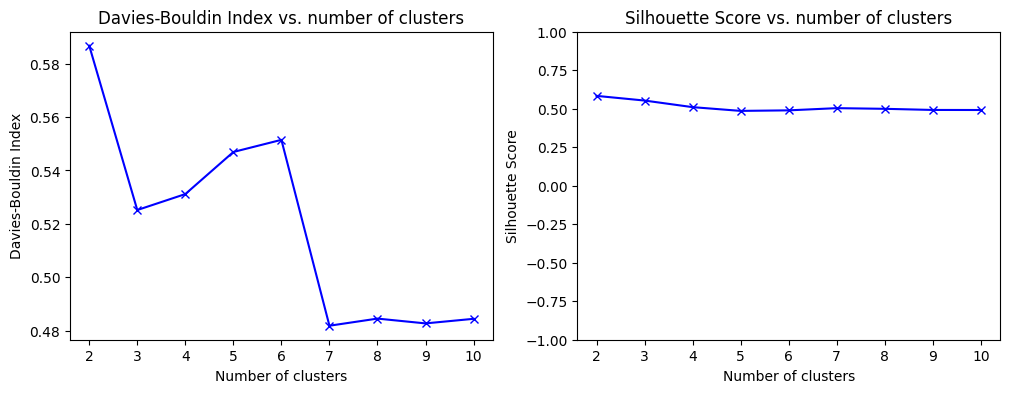

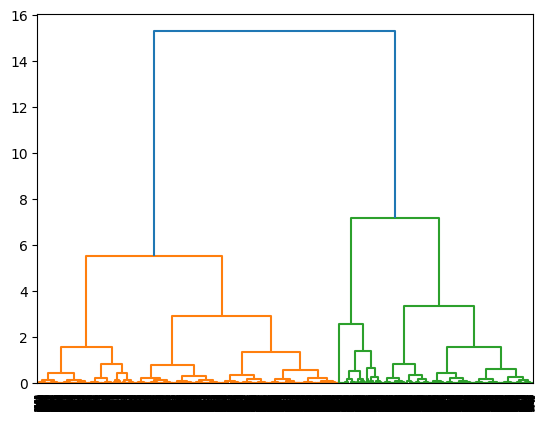

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Cluster Labels  Cluster Size
0               0          2225
1               1          3456


In [ ]:
# Select column for clustering
X = negative_df[['Negative Score']]

# Calculate pairwise distances using euclidean distance
distance_mat = pdist(X, metric='euclidean')

# Apply linkage to create hierarchy
Z = linkage(distance_mat, method='ward')

silhouette_scores = []
db_scores = []
for k in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
    db_scores.append(davies_bouldin_score(X, cluster_labels))

# Plot Davies-Bouldin Index vs. number of clusters
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].plot(range(2, 11), db_scores, 'bx-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Davies-Bouldin Index vs. number of clusters')

# Plot silhouette score vs. number of clusters
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. number of clusters')
plt.ylim(-1, 1)  # Set the y-axis limits to -1 and 1
plt.show()

# Find the optimal number of clusters based on silhouette score
optimal_k_silhouette = np.argmax(silhouette_scores) + 2
#print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")

# Find the optimal number of clusters based on Davies-Bouldin Index
optimal_k = np.argmin(db_scores) + 2
#print(f"Optimal number of clusters: {optimal_k}")

# Plot dendrogram
dendrogram(Z, leaf_rotation=90)
plt.show()

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(X)

# Add cluster labels to dataframe
negative_df['Cluster Labels'] = cluster_labels

# Print size of each cluster
print(negative_df.groupby(['Cluster Labels']).size().reset_index(name='Cluster Size'))


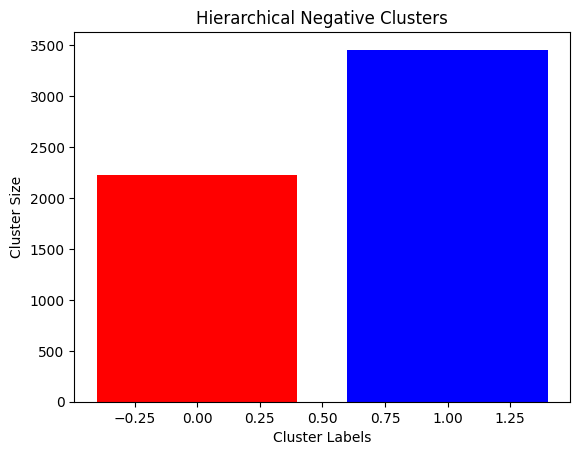

In [ ]:
import matplotlib.pyplot as plt
# Grouping the data by 'Cluster Labels' and calculating the size of each cluster
cluster_sizes = negative_df.groupby('Cluster Labels').size().reset_index(name='Cluster Size')

# Define colors for each cluster
colors = ['red', 'blue']

# Plot the bar chart with specified colors
plt.bar(cluster_sizes['Cluster Labels'], cluster_sizes['Cluster Size'], color=colors)

plt.xlabel('Cluster Labels')
plt.ylabel('Cluster Size')
plt.title('Hierarchical Negative Clusters')

plt.show()


Cluster 0:


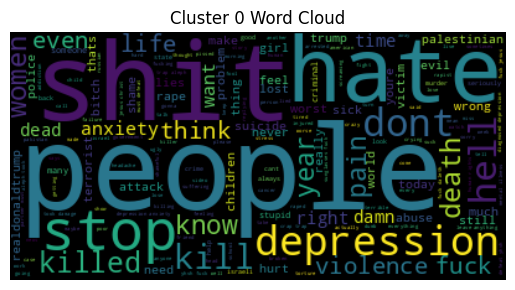

Cluster 1:


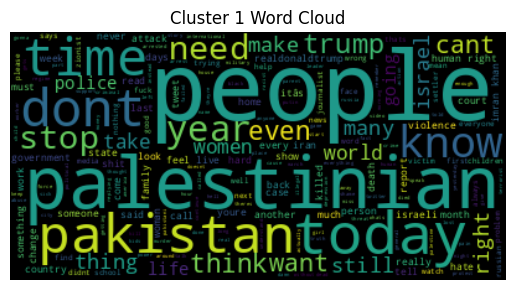

In [ ]:
for i in range(2):
    print(f"Cluster {i}:")
    cluster_indices = negative_df[negative_df['Cluster Labels'] == i].index
    cluster_text = negative_df.loc[cluster_indices, 'Negative Tweet']

    # Generate word cloud for the cluster
    cluster_wordcloud = WordCloud().generate(' '.join(cluster_text))

    # Plot the word cloud
    plt.figure()
    plt.imshow(cluster_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

In [ ]:
# Save the cluster labels to a pickle file
with open('hierarchical_negative_labels.pkl', 'wb') as f:
    pickle.dump(cluster_labels, f)

In [ ]:
# Print the contents of the labels array
print(cluster_labels)

[1 1 1 ... 0 0 0]


In [ ]:
!pip install matplotlib
import matplotlib

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Centroid of Cluster 1: Negative Score    0.583257
dtype: float64
Centroid of Cluster 2: Negative Score    0.289286
dtype: float64
Centroid of Cluster 3: Negative Score   NaN
dtype: float64


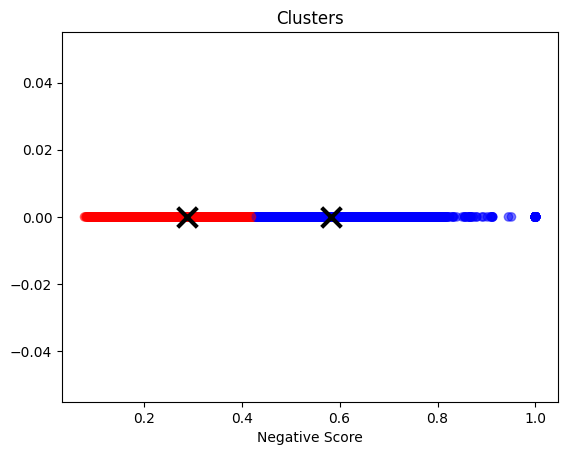

In [ ]:
# Calculate centroids
centroids = []
for i in range(3):
    centroid = np.mean(X[cluster_labels == i])
    centroids.append(centroid)
    print(f"Centroid of Cluster {i+1}: {centroid}")

# Plot data points with cluster labels
colors = ['blue', 'green', 'red']
plt.scatter(X, np.zeros(len(X)), c=cluster_labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

# Plot centroids
plt.scatter(centroids, np.zeros(len(centroids)), marker='x', color='black', s=200, linewidths=3)

plt.xlabel('Negative Score')
plt.title('Clusters')
plt.show()

In [ ]:
print(negative_df.groupby(['Cluster Labels']).size().reset_index(name='Cluster Size'))

   Cluster Labels  Cluster Size
0               0          2225
1               1          3456


In [ ]:
# Print score range for each cluster
for i in range(2):
    cluster_data = negative_df.loc[negative_df['Cluster Labels'] == i]
    score_min = cluster_data['Negative Score'].min()
    score_max = cluster_data['Negative Score'].max()
    print(f"Cluster {i}: {score_min} to {score_max}")

Cluster 0: 0.427 to 1.0
Cluster 1: 0.079 to 0.426


In [ ]:
negative_df.head(20)

,Negative Tweet,Negative Score,Cluster Labels
0,years since diagnosed anxiety depression today...,0.375,1
2,awake tired need sleep brain ideas,0.367,1
8,cant bothered cook take away lazy,0.295,1
14,urgh anxiety come breathe,0.362,1
27,even smallest thing still makes heart break do...,0.150,1
35,headache took three hours woke confused time,0.277,1
37,rspcaofficial ncolondon rspcaofficial please o...,0.415,1
38,bbccambs flying displays vintage jets signific...,0.360,1
40,dont sleep like catsoftwitter,0.413,1
49,offensivebanter awful,0.750,0


# **6. Hierarchical Clustering on Postive Tweets**

In [ ]:
# Create a new DataFrame with only the positive tweets and their positive scores
positive_df = df.loc[df['tweet_sentiment'] == 'positive', ['text', 'tweet_positive_score']]

# Rename the columns in the new DataFrame
positive_df.columns = ['Positive Tweet', 'Positive Score']

In [ ]:
positive_df.head()

,Positive Tweet,Positive Score
3,sewhq retro bears make perfect gifts great beg...,0.464
4,hard whether packing lists making life easier ...,0.176
13,back house moving stuff peaceful,0.444
17,packing purging feels good,0.492
21,theres nothing like cocktails exhaustion good ...,0.413


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

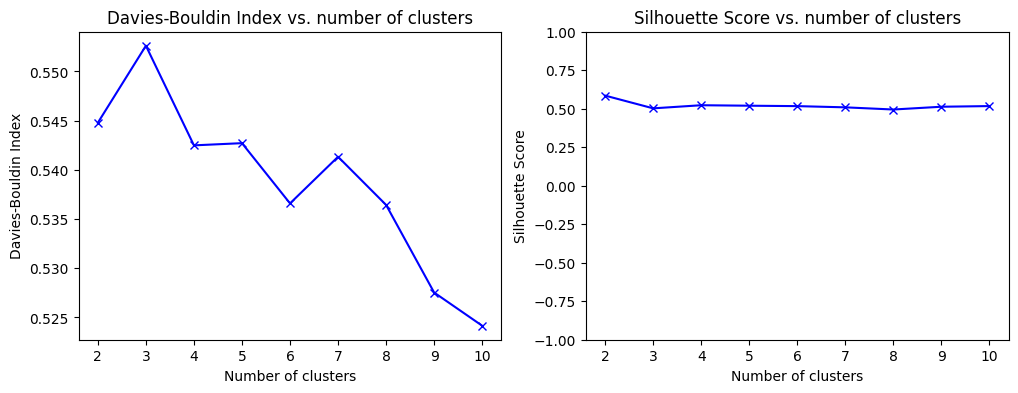

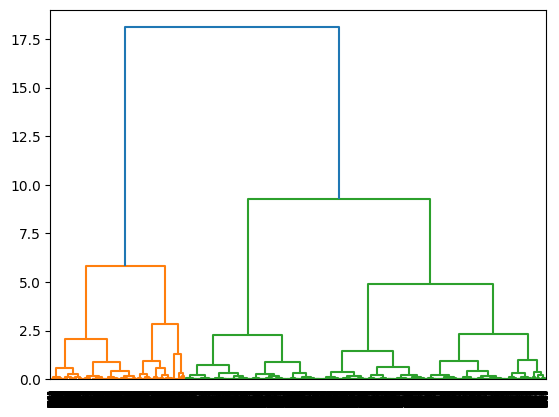

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


   Cluster Labels  Cluster Size
0               0          5669
1               1          2109


In [ ]:
# Select column for clustering
P = positive_df[['Positive Score']]

# Calculate pairwise distances using euclidean distance
distance_mat = pdist(P, metric='euclidean')

# Apply linkage to create hierarchy
Z = linkage(distance_mat, method='ward')

silhouette_scores = []
db_scores = []
for k in range(2, 11):
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cluster_labels = cluster.fit_predict(P)
    silhouette_scores.append(silhouette_score(P, cluster_labels))
    db_scores.append(davies_bouldin_score(P, cluster_labels))

# Plot Davies-Bouldin Index vs. number of clusters
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
ax[0].plot(range(2, 11), db_scores, 'bx-')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Davies-Bouldin Index')
ax[0].set_title('Davies-Bouldin Index vs. number of clusters')

# Plot silhouette score vs. number of clusters
plt.plot(range(2, 11), silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. number of clusters')
plt.ylim(-1, 1)  # Set the y-axis limits to -1 and 1
plt.show()

# Find the optimal number of clusters based on silhouette score
optimal_k_silhouette = np.argmax(silhouette_scores) + 2
#print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")

# Find the optimal number of clusters based on Davies-Bouldin Index
optimal_k = np.argmin(db_scores) + 2
#print(f"Optimal number of clusters: {optimal_k}")

# Plot dendrogram
dendrogram(Z, leaf_rotation=90)
plt.show()

# Apply hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster_labels = cluster.fit_predict(P)

# Add cluster labels to dataframe
positive_df['Cluster Labels'] = cluster_labels

# Print size of each cluster
print(positive_df.groupby(['Cluster Labels']).size().reset_index(name='Cluster Size'))


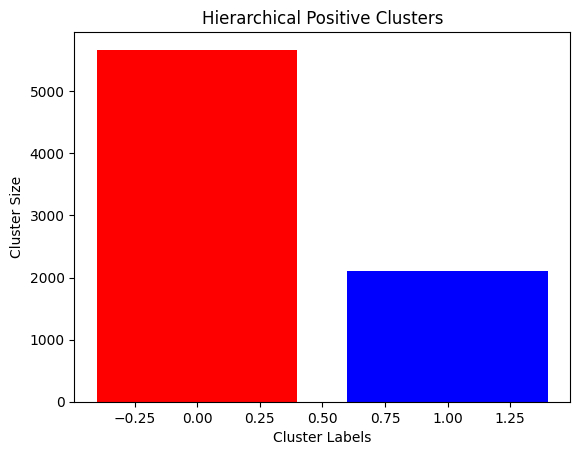

In [ ]:
import matplotlib.pyplot as plt
# Grouping the data by 'Cluster Labels' and calculating the size of each cluster
cluster_sizes = positive_df.groupby('Cluster Labels').size().reset_index(name='Cluster Size')

# Define colors for each cluster
colors = ['red', 'blue']

# Plot the bar chart with specified colors
plt.bar(cluster_sizes['Cluster Labels'], cluster_sizes['Cluster Size'], color=colors)

plt.xlabel('Cluster Labels')
plt.ylabel('Cluster Size')
plt.title('Hierarchical Positive Clusters')

plt.show()


Cluster 0:


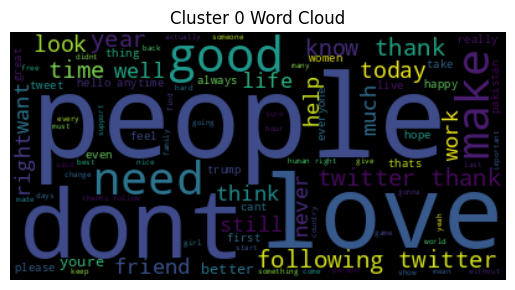

Cluster 1:


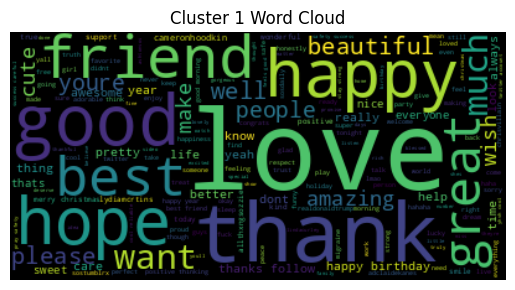

In [ ]:
for i in range(2):
    print(f"Cluster {i}:")
    cluster_indices = positive_df[positive_df['Cluster Labels'] == i].index
    cluster_text = positive_df.loc[cluster_indices, 'Positive Tweet']

    # Generate word cloud for the cluster
    cluster_wordcloud = WordCloud().generate(' '.join(cluster_text))

    # Plot the word cloud
    plt.figure()
    plt.imshow(cluster_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Cluster {i} Word Cloud")
    plt.show()

In [ ]:
# Save the cluster labels to a pickle file
with open('hierarchical_positive_labels.pkl', 'wb') as f:
    pickle.dump(cluster_labels, f)

In [ ]:
# Print the contents of the labels array
print(cluster_labels)

[0 0 0 ... 0 0 1]


Centroid of Cluster 1: Positive Score    0.338886
dtype: float64
Centroid of Cluster 2: Positive Score    0.665292
dtype: float64
Centroid of Cluster 3: Positive Score   NaN
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


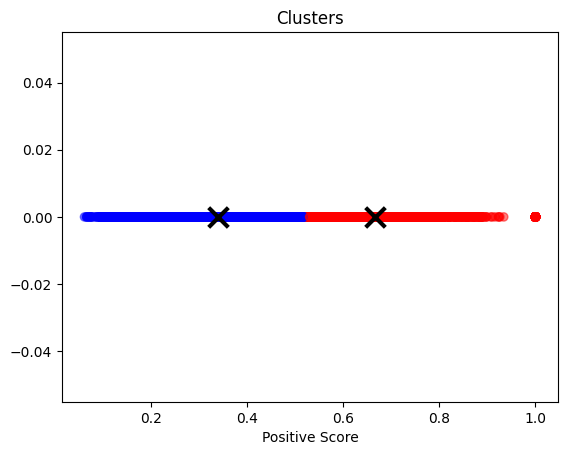

In [ ]:
# Calculate centroids
centroids = []
for i in range(3):
    centroid = np.mean(P[cluster_labels == i])
    centroids.append(centroid)
    print(f"Centroid of Cluster {i+1}: {centroid}")

# Plot data points with cluster labels
colors = ['blue', 'green', 'red']
plt.scatter(P, np.zeros(len(P)), c=cluster_labels, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

# Plot centroids
plt.scatter(centroids, np.zeros(len(centroids)), marker='x', color='black', s=200, linewidths=3)

plt.xlabel('Positive Score')
plt.title('Clusters')
plt.show()

In [ ]:
print(positive_df.groupby(['Cluster Labels']).size().reset_index(name='Cluster Size'))

   Cluster Labels  Cluster Size
0               0          5669
1               1          2109


In [ ]:
# Print score range for each cluster
for i in range(2):
    cluster_data = positive_df.loc[positive_df['Cluster Labels'] == i]
    score_min = cluster_data['Positive Score'].min()
    score_max = cluster_data['Positive Score'].max()
    print(f"Cluster {i}: {score_min} to {score_max}")

Cluster 0: 0.061 to 0.521
Cluster 1: 0.523 to 1.0
